#### This is for a practice in random forest algorithm using housing price dataset 
#### Citation: https://www.geeksforgeeks.org/machine-learning/random-forest-algorithm-in-machine-learning


In [86]:
# Load packages/libraries required for random forest algorithm
import pandas as pd
from sklearn.datasets import fetch_california_housing 

# Store imported dataset 
california_housing = fetch_california_housing()

# Convert the stored dataset into a dataframe 
california_data = pd.DataFrame(california_housing.data, columns = california_housing.feature_names) 

california_data['MEDV'] = california_housing.target # Define the target to be "MEDV: Median value of house"
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
california_data['MEDV'].min()

0.14999

In [38]:
# Identify target for prediction 
print(california_housing.target_names) # ['MedHouseVal']: Median House Value
CALI

# Identify features for prediction
print(california_housing.feature_names)

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [64]:
# Divide dataset into feature and target dataset
X = california_data.drop("MEDV", axis = 1)
y = california_data["MEDV"]

from sklearn.model_selection import train_test_split
# Split dataset into train and test data (20%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor 
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42) # 100 decision trees
random_forest_regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [68]:
y_pred = random_forest_regressor.predict(X_test)

array([0.5095   , 0.74161  , 4.9232571, ..., 4.7582187, 0.71409  ,
       1.65083  ])

In [114]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

In [94]:
single_data = X_test.iloc[0].values.reshape(1,-1)
single_data

array([[ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,
         1.02228412e+00,  1.39200000e+03,  3.87743733e+00,
         3.60600000e+01, -1.19010000e+02]])

In [98]:
# Perform prediction with a selected single data point
single_data = X_test.iloc[0].values.reshape(1,-1)
predicted_value = random_forest_regressor.predict(single_data) 

C:\Users\minjk\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [110]:
# Display results

# Predicted house price value
print(predicted_value[0])

0.5094999999999998


In [112]:
# Actual value 
print(y_test.iloc[0])

0.477


In [122]:
# Mean Square Error 
print(mse)

0.2553684927247781


In [124]:
# R-squared
print(r2)

0.8051230593157366


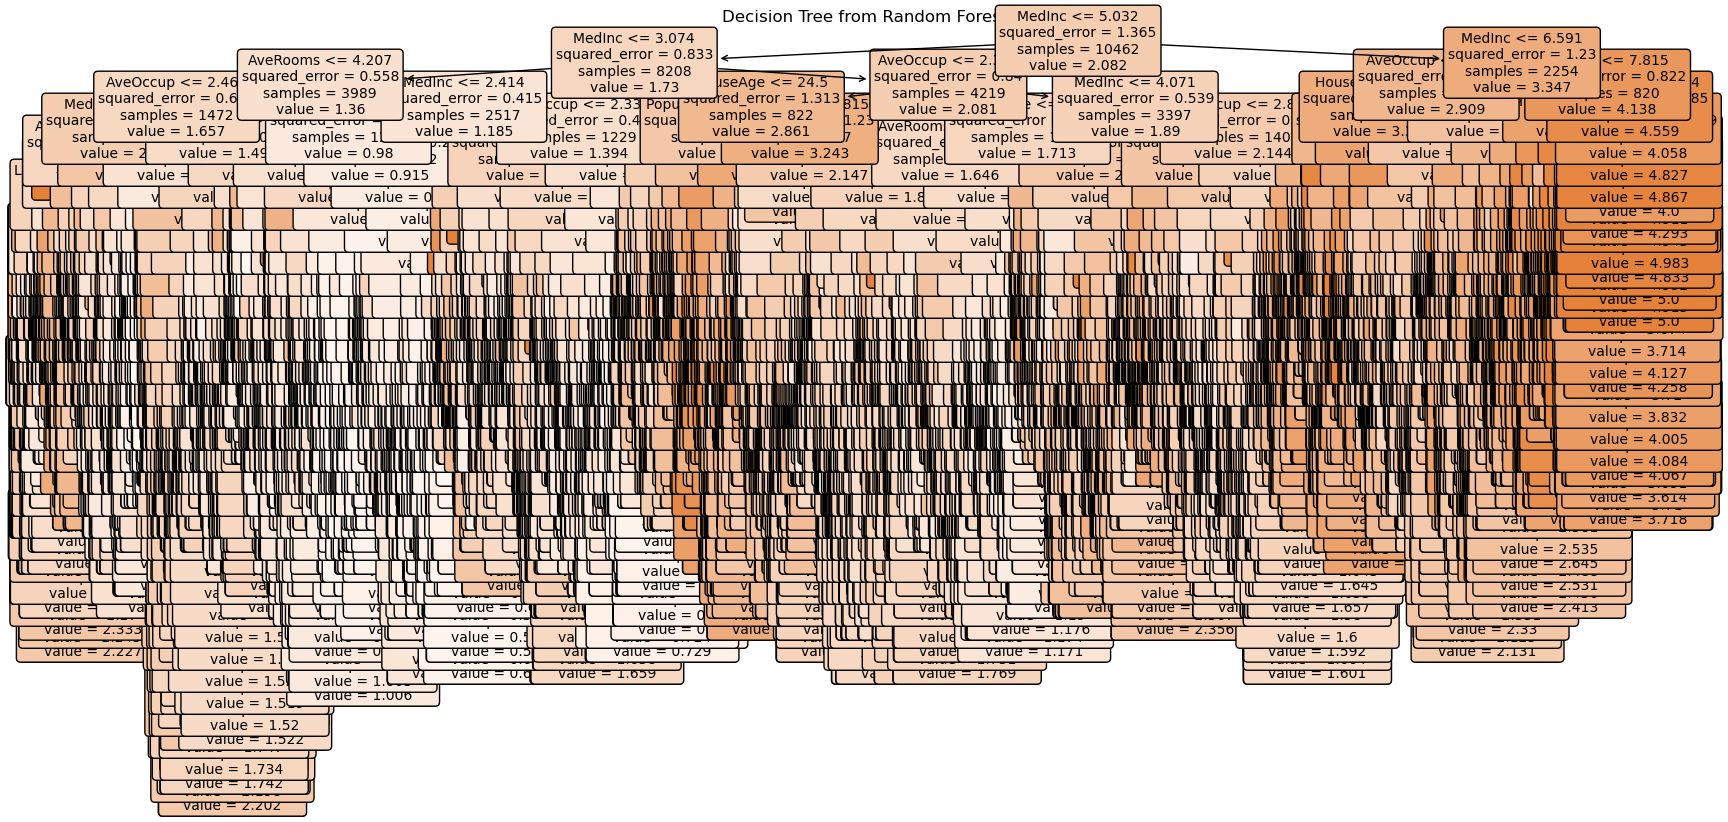

In [130]:
# Visualize one of the decision trees from the trained Random Forest Model 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
tree_to_plot = random_forest_regressor.estimators_[0]

plt.figure(figsize = (20,10))
plot_tree(tree_to_plot, feature_names = california_housing.feature_names, filled = True, rounded = True, fontsize = 10)
plt.title("Decision Tree from Random Forest")
plt.show()